### gradient descent for linear regression

![alt text](img_gd_lr.JPG)

### problem statement

![image.png](img_gd_ps.JPG)

In [1]:
# imports

import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# linear regression functions

# function to compute cost
def compute_cost(x, y, w, b):
    
    m = x.shape[0]
    cost_sum = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (y[i] - f_wb) ** 2
        cost_sum = cost_sum + cost
        
    total_cost = (1/(2*m)) * cost_sum
    
    return total_cost

# compute function for linear regression model output
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b 
    return f_wb

### gradient descent summary

![image.png](img_gd_formula.JPG)

### gradient descent impl

![image.png](img_gd_impl.JPG)

In [3]:
# computing gradient

def compute_gradient (x, y, w, b):
    
    # m -> number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
       f_wb =  w * x[i] + b
       dj_dw_i = (f_wb - y [i]) * x[i]
       dj_db_i = f_wb - y [i]
       
       dj_dw += dj_dw_i
       dj_db += dj_db_i
    
    dj_dw = (1/m) * dj_dw
    dj_db = (1/m) * dj_db
    
    return dj_dw, dj_db

In [4]:
# gradient descent function

def gradient_descent (x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      w_history (list): History of parameter w
      b_history (list): History of parameter b
      """
    
    # deep copy to avoid modifying global values of w, b
    w = copy.deepcopy(w_in)
    b = copy.deepcopy(b_in)
    
    J_history = []
    w_history = []
    b_history = []

    
    for i in range(num_iters):
        
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function (x, y, w, b)
        
        # Update Parameters using equation (3) above
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save history for first 100000 iterations
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            w_history.append(w)
            b_history.append(b)
        
        # Print cost at every interval of numb_iters/10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
        
    return w, b, J_history, w_history, b_history

In [5]:
# running gradient descent

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730])

w_init = 0
b_init = 0

iterations = 10000
alpha_tmp = 1.0e-2

w_final, b_final, J_hist, w_hist, b_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha_tmp, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")



Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 1000: Cost 1.78e+03  dj_dw: -1.060e+00, dj_db:  2.599e+00   w:  1.974e+02, b: 3.16325e+01
Iteration 2000: Cost 1.74e+03  dj_dw: -4.357e-01, dj_db:  1.068e+00   w:  2.045e+02, b: 1.44256e+01
Iteration 3000: Cost 1.74e+03  dj_dw: -1.790e-01, dj_db:  4.388e-01   w:  2.074e+02, b: 7.35495e+00
Iteration 4000: Cost 1.74e+03  dj_dw: -7.357e-02, dj_db:  1.803e-01   w:  2.085e+02, b: 4.44950e+00
Iteration 5000: Cost 1.74e+03  dj_dw: -3.023e-02, dj_db:  7.410e-02   w:  2.090e+02, b: 3.25559e+00
Iteration 6000: Cost 1.74e+03  dj_dw: -1.242e-02, dj_db:  3.045e-02   w:  2.092e+02, b: 2.76500e+00
Iteration 7000: Cost 1.74e+03  dj_dw: -5.104e-03, dj_db:  1.251e-02   w:  2.093e+02, b: 2.56340e+00
Iteration 8000: Cost 1.74e+03  dj_dw: -2.097e-03, dj_db:  5.141e-03   w:  2.093e+02, b: 2.48056e+00
Iteration 9000: Cost 1.74e+03  dj_dw: -8.619e-04, dj_db:  2.113e-03   w:  2.094e+02, b: 2.44652e+00


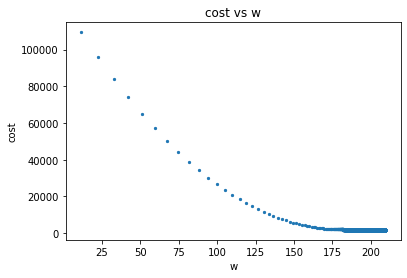

In [6]:
# plotting cost vs w (from gradient descent history)

plt.scatter (w_hist, J_hist, s = 5)
plt.title("cost vs w")
plt.xlabel("w")
plt.ylabel("cost")
plt.show()

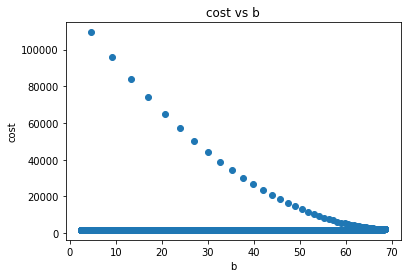

In [7]:
# plotting cost vs b (from gradient descent history)
plt.clf()
plt.scatter (b_hist, J_hist)
plt.title("cost vs b")
plt.xlabel("b")
plt.ylabel("cost")
plt.show()

### observations

    w vs cost 
    - cost gradually minimizes as we approach optimal w
    
    b vs cost
    - we see we have 2 different values costs for the same b, this is because we are updating w simultaneously as well
    - initially b & w are both 0, and cost is high
    - over multiple iterations w & b gets adjusted such that b gradually increases along with changes in w and costs starts decreasing
    - after a point cost reaches minimum & w is changing such that value of b stops affecting the cost and b starts decreasing to a value of around 2.4
    - this means we can choose some other near optimal w for a much higher b and cost would stay near minimum
        

<Figure size 432x288 with 0 Axes>

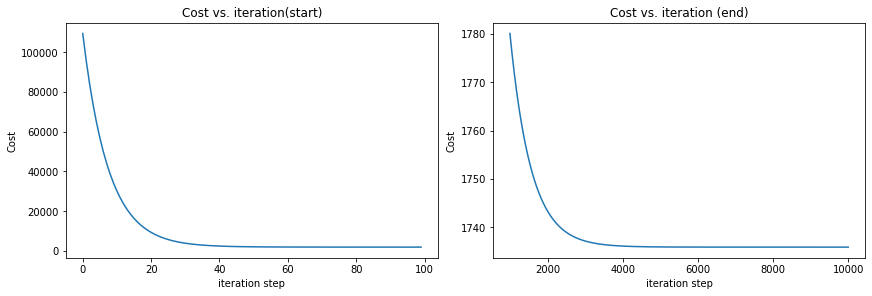

In [8]:
# plotting number of cost vs iterations

plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:100])
ax2.plot(range(1000, iterations), J_hist[1000:])

ax1.set_title("Cost vs. iteration(start)") 
ax2.set_title("Cost vs. iteration (end)")

ax1.set_ylabel('Cost')            
ax2.set_ylabel('Cost') 

ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step') 

plt.show()

In [9]:
# plotting cost vs w,b using contour plots - calculations

w_range = [-100, 500, 0.5]
b_range = [-500, 500, 0.5]

W, B = np.meshgrid(np.arange(*w_range), np.arange(*b_range))
Z = np.zeros_like(W)
    
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i][j] = compute_cost(x_train, y_train, W[i][j], B[i][j] )

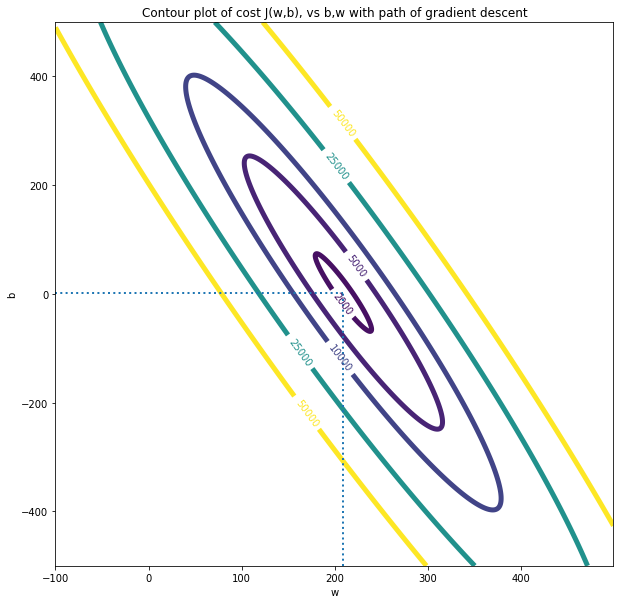

In [10]:
# plotting cost vs w,b using contour plots

contours = [0,10, 100, 1000,2000, 5000,10000,25000,50000]

fig, ax = plt.subplots()

fig.set_figheight(10)
fig.set_figwidth(10)

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_title('Contour plot of cost J(w,b), vs b,w with path of gradient descent')

CS = ax.contour(W, B, Z, contours, linewidths=5)
ax.clabel(CS, fontsize=10)

w = w_final
b = b_final

ax.hlines(b, ax.get_xlim()[0], w, lw=2, ls='dotted')
ax.vlines(w, ax.get_ylim()[0], b, lw=2, ls='dotted')

In [11]:
# plotting w, b vs z in 3D - calculations

w_range = [-100, 500, 0.5]
b_range = [-500, 500, 0.5]

W, B = np.meshgrid(np.arange(*w_range), np.arange(*b_range))
Z = np.zeros_like(W)
    
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i][j] = compute_cost(x_train, y_train, W[i][j], B[i][j] )

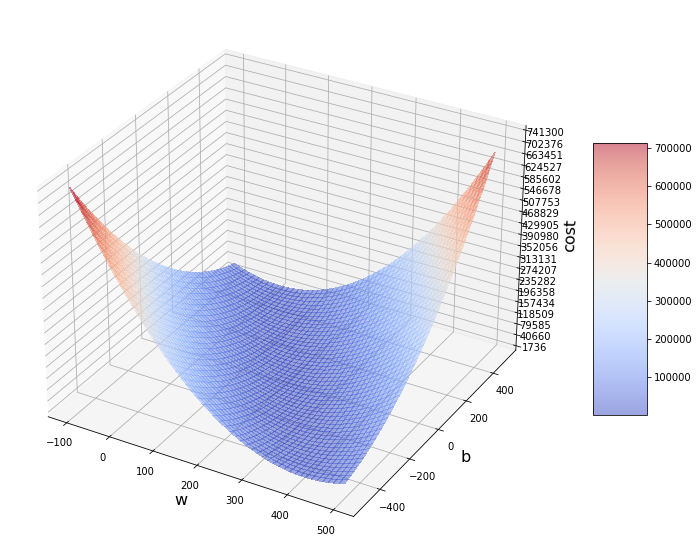

In [12]:
# plotting w, b vs z in 3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the surface.
surf = ax.plot_surface(W, B, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False,alpha=0.5)

ax.zaxis.set_major_locator(LinearLocator(20))

fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('w', fontsize=16)
ax.set_ylabel('b', fontsize=16)
ax.set_zlabel('\ncost', fontsize=16)

plt.show()

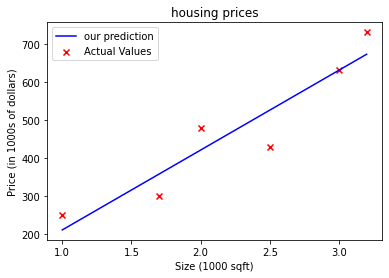

In [13]:
### predicting output with trained model

w = w_final
b = b_final

# compute function for linear regression model output
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b 
    return f_wb

# calling compute function and plotting the result
tmp_f_wb = compute_model_output(x_train, w, b)

# plotting model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='our prediction')

# plotting original training data
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

plt.title('housing prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')

plt.legend()
plt.show()